#### Interesting Resources for Clustering Examples
1. https://www.kaggle.com/dhanyajothimani/basic-visualization-and-clustering-in-python
2. https://www.learndatasci.com/tutorials/k-means-clustering-algorithms-python-intro/
3. https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/
4. https://towardsdatascience.com/an-introduction-to-clustering-algorithms-in-python-123438574097

In [1]:
# read pickled data files in (using Justin's pre-processing notebook)
import pandas as pd

X_train = pd.read_pickle('X_train.pkl')
y_train = pd.read_pickle('y_train.pkl')
X_test = pd.read_pickle('X_test.pkl')
y_test = pd.read_pickle('y_test.pkl')

In [2]:
# Print out features
features = X_train.columns
features

Index(['ProductName_win8defender', 'EngineVersion_1.1.15100.1',
       'EngineVersion_1.1.15200.1', 'EngineVersion_Other',
       'AppVersion_4.18.1807.18075', 'AppVersion_4.18.1806.18062',
       'RtpStateBitfield_Other', 'IsSxsPassiveMode_Other',
       'AVProductStatesIdentifier_7945', 'AVProductStatesIdentifier_47238',
       ...
       'Wdft_RegionIdentifier_11.0', 'Wdft_RegionIdentifier_15.0',
       'Wdft_RegionIdentifier_3.0', 'Wdft_RegionIdentifier_Other',
       'AvSigVersion_277_1', 'AvSigVersion_275_1', 'AvSigVersion_273_1',
       'Census_TotalPhysicalRAM_2k_1', 'Census_TotalPhysicalRAM_8k_1',
       'Census_TotalPhysicalRAM_12k_1'],
      dtype='object', length=111)

In [3]:
#Split into train and test
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_train,y_train,train_size = 30000)

print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

/usr/local/Cellar/python/3.7.2_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


(30000, 111)
(30000,)
(4341527, 111)
(4341527,)


#### Hierarchical Clustering Attemp #1

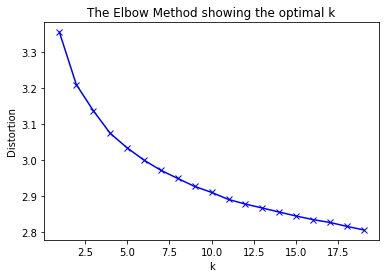

In [31]:
# determine k using elbow method
# https://pythonprogramminglanguage.com/kmeans-elbow-method/

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

# k means determine k
distortions = []
K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X_train)
    kmeanModel.fit(X_train)
    distortions.append(sum(np.min(cdist(X_train, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X_train.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

##Since there is no elbow, this kind of confirms what we thought originally that euclidean distance makes no sense
# for our data points.

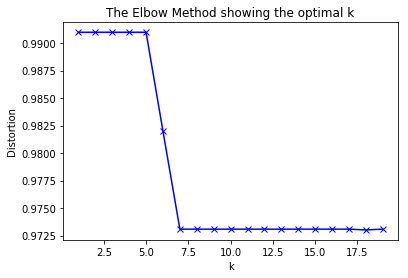

In [19]:
# determine k using elbow method
# https://pythonprogramminglanguage.com/kmeans-elbow-method/

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

# k means determine k
distortions = []
K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X_train)
    kmeanModel.fit(X_train)
    distortions.append(sum(np.min(cdist(X_train, kmeanModel.cluster_centers_, 'hamming'), axis=1)) / X_train.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

## This is a very interesting bend.. perhaps this means about 7 clusters could be appropriate using hamming distance?

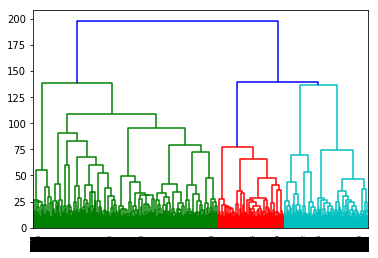

In [26]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(X_train, method='ward'))
# create clusters
hc = AgglomerativeClustering(n_clusters=7, affinity = 'euclidean', linkage = 'ward')
# save clusters for chart
y_hc = hc.fit_predict(X_train)

In [ ]:
#https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(X_train, method='ward'))
# create clusters
hc = AgglomerativeClustering(n_clusters=7, affinity = 'hamming', linkage = 'average')
# save clusters for chart
y_hc = hc.fit_predict(X_train)

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [10.0, 10.0, 32.5, 32.5],
  [75.0, 75.0, 85.0, 85.0],
  [65.0, 65.0, 80.0, 80.0],
  [55.0, 55.0, 72.5, 72.5],
  [105.0, 105.0, 115.0, 115.0],
  [95.0, 95.0, 110.0, 110.0],
  [135.0, 135.0, 145.0, 145.0],
  [125.0, 125.0, 140.0, 140.0],
  [155.0, 155.0, 165.0, 165.0],
  [175.0, 175.0, 185.0, 185.0],
  [160.0, 160.0, 180.0, 180.0],
  [132.5, 132.5, 170.0, 170.0],
  [102.5, 102.5, 151.25, 151.25],
  [63.75, 63.75, 126.875, 126.875],
  [21.25, 21.25, 95.3125, 95.3125],
  [205.0, 205.0, 215.0, 215.0],
  [235.0, 235.0, 245.0, 245.0],
  [225.0, 225.0, 240.0, 240.0],
  [210.0, 210.0, 232.5, 232.5],
  [195.0, 195.0, 221.25, 221.25],
  [255.0, 255.0, 265.0, 265.0],
  [275.0, 275.0, 285.0, 285.0],
  [260.0, 260.0, 280.0, 280.0],
  [295.0, 295.0, 305.0, 305.0],
  [325.0, 325.0, 335.0, 335.0],
  [315.0, 315.0, 330.0, 330.0],
  [300.0, 300.0, 322.5, 322.5],
  [270.0, 270.0, 311.25, 311.25],
  [208.125, 208.

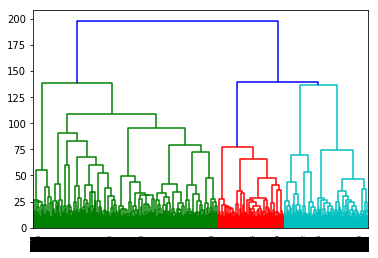

In [55]:
%matplotlib inline
sch.dendrogram(sch.linkage(X_train, method='ward'))

In [45]:
# Python program to count the frequency of elements in a list
  
def CountFrequency(my_list): 
  
    # Creating an empty dictionary  
    freq = {} 
    for item in my_list: 
        if (item in freq): 
            freq[item] += 1
        else: 
            freq[item] = 1
  
    for key, value in freq.items(): 
        print ("% d : % d"%(key, value))

In [46]:
CountFrequency(y_hc)

 3 :  1704
 5 :  5982
 4 :  2920
 6 :  3268
 1 :  4557
 0 :  5902
 2 :  5667


Cophenetic Correlation Coefficient: 
This compares the actual pairwise distances of all your samples to those implied by the hierarchical clustering. The closer the value is to 1, the better the clustering preserves the original distances.

In [49]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

Z = linkage(X_train, 'average')

c, coph_dists = cophenet(Z, pdist(X_train, metric='hamming'))
c

TypeError: Linkage matrix 'Z' must contain doubles.